<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-로드" data-toc-modified-id="1.-데이터-로드-1">1. 데이터 로드</a></span></li><li><span><a href="#2.-데이터-병합-및-전처리" data-toc-modified-id="2.-데이터-병합-및-전처리-2">2. 데이터 병합 및 전처리</a></span><ul class="toc-item"><li><span><a href="#2.1-데이터-병합" data-toc-modified-id="2.1-데이터-병합-2.1">2.1 데이터 병합</a></span></li><li><span><a href="#2.2-데이터-유형-변환" data-toc-modified-id="2.2-데이터-유형-변환-2.2">2.2 데이터 유형 변환</a></span></li><li><span><a href="#2.3-파생변수-추가" data-toc-modified-id="2.3-파생변수-추가-2.3">2.3 파생변수 추가</a></span></li></ul></li><li><span><a href="#3.-EDA" data-toc-modified-id="3.-EDA-3">3. EDA</a></span><ul class="toc-item"><li><span><a href="#3.1-종속변수-분포" data-toc-modified-id="3.1-종속변수-분포-3.1">3.1 종속변수 분포</a></span></li><li><span><a href="#3.2-독립변수-(명목형)-분포" data-toc-modified-id="3.2-독립변수-(명목형)-분포-3.2">3.2 독립변수 (명목형) 분포</a></span></li><li><span><a href="#3.3-독립변수-(명목형)---구매건수" data-toc-modified-id="3.3-독립변수-(명목형)---구매건수-3.3">3.3 독립변수 (명목형) - 구매건수</a></span></li><li><span><a href="#3.4-독립변수-(수치형)-분포" data-toc-modified-id="3.4-독립변수-(수치형)-분포-3.4">3.4 독립변수 (수치형) 분포</a></span></li><li><span><a href="#3.5-독립변수-(수치형)---구매건수-상관관계" data-toc-modified-id="3.5-독립변수-(수치형)---구매건수-상관관계-3.5">3.5 독립변수 (수치형) - 구매건수 상관관계</a></span></li></ul></li></ul></div>

# 1. 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
날씨 = pd.read_csv('./data/전국날씨데이터.csv')
print(날씨.shape)
날씨.head(3)

(730, 9)


,일시,평균기온(℃),평균일강수량(mm),평균풍속(km/h),평균습도(%rh),일조합,일사합,체감온도(℃),일 미세먼지 농도(㎍/㎥)
0,2019-12-31,-3.8,0.1,12.96,46.0,8.8,11.31,-8.642578,19.758621
1,2019-12-30,5.0,0.9,7.56,79.0,2.2,3.96,3.252319,24.296296
2,2019-12-29,2.6,6.2,4.32,73.0,0.2,3.33,1.669374,34.172414


In [3]:
소셜1 = pd.read_csv('./data/sns2018_1.csv')
소셜2 = pd.read_csv('./data/sns2018_2.csv')
소셜3 = pd.read_csv('./data/sns2019_1.csv')
소셜4 = pd.read_csv('./data/sns2019_2.csv')

소셜1 = 소셜1.drop('Unnamed: 0', axis=1)
소셜1.columns = ['일시','대분류명','소분류명','10만건당 건수']

소셜2 = 소셜2.drop('Unnamed: 0', axis=1)
소셜2.columns = ['일시','대분류명','소분류명','10만건당 건수']

소셜3 = 소셜3.drop('Unnamed: 0', axis=1)
소셜3.columns = ['일시','대분류명','소분류명','10만건당 건수']

소셜4 = 소셜4.drop('Unnamed: 0', axis=1)
소셜4.columns = ['일시','대분류명','소분류명','10만건당 건수']

소셜 = pd.concat([소셜1, 소셜2, 소셜3, 소셜4], axis=0)
print(소셜.shape)
소셜.head(3)

(279590, 4)


,일시,대분류명,소분류명,10만건당 건수
0,20180101,뷰티,기능성 링클케어 화장품,12.154295
1,20180101,뷰티,기능성 모공관리 화장품,36.000828
2,20180101,뷰티,기능성 아이케어 화장품,0.895782


In [4]:
구매1 = pd.read_csv('./data/buy2018_1.csv')
구매2 = pd.read_csv('./data/buy2018_2.csv')
구매3 = pd.read_csv('./data/buy2019_1.csv')
구매4 = pd.read_csv('./data/buy2019_2.csv')

구매1 = 구매1.drop('Unnamed: 0', axis=1)
구매1.columns = ['일시','성별','연령대','대분류명','소분류명','구매건수']

구매2 = 구매2.drop('Unnamed: 0', axis=1)
구매2.columns = ['일시','성별','연령대','대분류명','소분류명','구매건수']

구매3 = 구매3.drop('Unnamed: 0', axis=1)
구매3.columns = ['일시','성별','연령대','대분류명','소분류명','구매건수']

구매4 = 구매4.drop('Unnamed: 0', axis=1)
구매4.columns = ['일시','성별','연령대','대분류명','소분류명','구매건수']

구매 = pd.concat([구매1, 구매2, 구매3, 구매4], axis=0)
print(구매.shape)
구매.head(3)

(2056899, 6)


,일시,성별,연령대,대분류명,소분류명,구매건수
0,20180101,F,20,식품,가공란,37
1,20180101,F,30,식품,가공란,16
2,20180101,F,40,식품,가공란,9


# 2. 데이터 병합 및 전처리

## 2.1 데이터 병합

일시 기준으로 구매, 날씨 데이터를 병합한 후,

일시, 대분류명, 소분류명을 기준으로 소셜 데이터 병합

In [5]:
구매['일시'] = 구매['일시'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
날씨['일시'] = 날씨['일시'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
소셜['일시'] = 소셜['일시'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))

In [6]:
print(구매['일시'].dtype)
print(날씨['일시'].dtype)
print(소셜['일시'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [7]:
# 구매 - 날씨 데이터 병합
m_data = pd.merge(구매, 날씨, on='일시')
print(m_data.shape)
m_data.head(3)

(2056899, 14)


,일시,성별,연령대,대분류명,소분류명,구매건수,평균기온(℃),평균일강수량(mm),평균풍속(km/h),평균습도(%rh),일조합,일사합,체감온도(℃),일 미세먼지 농도(㎍/㎥)
0,2018-01-01,F,20,식품,가공란,37,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963
1,2018-01-01,F,30,식품,가공란,16,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963
2,2018-01-01,F,40,식품,가공란,9,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963


In [8]:
# data - 소셜 데이터 병합
data = pd.merge(m_data, 소셜, on=['일시','대분류명','소분류명'])
print(data.shape)
data.head(3)

(2056899, 15)


,일시,성별,연령대,대분류명,소분류명,구매건수,평균기온(℃),평균일강수량(mm),평균풍속(km/h),평균습도(%rh),일조합,일사합,체감온도(℃),일 미세먼지 농도(㎍/㎥),10만건당 건수
0,2018-01-01,F,20,식품,가공란,37,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963,0.480964
1,2018-01-01,F,30,식품,가공란,16,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963,0.480964
2,2018-01-01,F,40,식품,가공란,9,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963,0.480964


In [9]:
# data.to_csv('./data/total_merged_data.csv', index=False)

## 2.2 데이터 유형 변환

In [2]:
data = pd.read_csv('./data/total_merged_data.csv')
print(data.shape)
data.head(3)

(2056899, 15)


,일시,성별,연령대,대분류명,소분류명,구매건수,평균기온(℃),평균일강수량(mm),평균풍속(km/h),평균습도(%rh),일조합,일사합,체감온도(℃),일 미세먼지 농도(㎍/㎥),10만건당 건수
0,2018-01-01,F,20,식품,가공란,37,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963,0.480964
1,2018-01-01,F,30,식품,가공란,16,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963,0.480964
2,2018-01-01,F,40,식품,가공란,9,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963,0.480964


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056899 entries, 0 to 2056898
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   일시              datetime64[ns]
 1   성별              object        
 2   연령대             int64         
 3   대분류명            object        
 4   소분류명            object        
 5   구매건수            int64         
 6   평균기온(℃)         float64       
 7   평균일강수량(mm)      float64       
 8   평균풍속(km/h)      float64       
 9   평균습도(%rh)       float64       
 10  일조합             float64       
 11  일사합             float64       
 12  체감온도(℃)         float64       
 13  일 미세먼지 농도(㎍/㎥)  float64       
 14  10만건당 건수        float64       
dtypes: datetime64[ns](1), float64(9), int64(2), object(3)
memory usage: 251.1+ MB


일시는 날짜 형식, 연령대는 object 형식으로 변경

In [10]:
data['일시'] = pd.to_datetime(data['일시'])
data['연령대'] = data['연령대'].astype(object)

## 2.3 파생변수 추가

월, 일, 계절, 요일, 평일/주말, 공휴일 칼럼을 추가하고 일시 칼럼 삭제

- 요일 (0: 월, 1: 화, 2: 수, 3: 목, 4: 금, 5: 토, 6: 일)


- 평일/주말 (0: 평일, 1: 주말)


- 계절 (3 ~ 5월: 봄, 6 ~ 8월: 여름, 9 ~ 11월: 가을, 12 ~ 2월: 겨울)


- 공휴일 (0: 공휴일X, 1: 공휴일O)

In [11]:
data2 = data.copy()
data2['월'] = data2['일시'].dt.month
data2['일'] = data2['일시'].dt.day
data2['요일'] = data2['일시'].apply(lambda x: x.weekday())
data2['평일/주말'] = 0
data2.loc[(data2['요일']==5) | (data2['요일']==6), '평일/주말'] = 1
data2['계절'] = 0
data2.loc[(data2['월']>=3) & (data2['월']<=5), '계절'] = '봄'
data2.loc[(data2['월']>=6) & (data2['월']<=8), '계절'] = '여름'
data2.loc[(data2['월']>=9) & (data2['월']<=11), '계절'] = '가을'
data2.loc[(data2['월']==12) | (data2['월']==1) | (data2['월']==2), '계절'] = '겨울'

In [12]:
# 공휴일 파일 로드
공휴일 = pd.read_excel('./data/국가공휴일.xlsx')
print(공휴일.shape)
공휴일.head(3)

(66, 5)


,순서,년,월,일,설명
0,1,2018,1,1,새해
1,2,2018,2,15,설날
2,3,2018,2,16,설날


In [13]:
공휴일['년'] = 공휴일['년'].astype(str)
공휴일['월'] = 공휴일['월'].astype(str)
공휴일['일'] = 공휴일['일'].astype(str)
공휴일['일시'] = 공휴일['년'] + '-' + 공휴일['월'] + '-' + 공휴일['일']
공휴일['일시'] = pd.to_datetime(공휴일['일시'])
공휴일['설명'] = 1
공휴일 = 공휴일[['일시', '설명']].rename(columns={'설명': '공휴일'})
공휴일.head(3)

,일시,공휴일
0,2018-01-01,1
1,2018-02-15,1
2,2018-02-16,1


In [14]:
data3 = pd.merge(data2, 공휴일, on='일시', how='left')
data3.head(3)

,일시,성별,연령대,대분류명,소분류명,구매건수,평균기온(℃),평균일강수량(mm),평균풍속(km/h),평균습도(%rh),...,일사합,체감온도(℃),일 미세먼지 농도(㎍/㎥),10만건당 건수,월,일,요일,평일/주말,계절,공휴일
0,2018-01-01,F,20,식품,가공란,37,-0.4,0.0,6.84,51.0,...,9.31,-2.810026,32.962963,0.480964,1,1,0,0,겨울,1.0
1,2018-01-01,F,30,식품,가공란,16,-0.4,0.0,6.84,51.0,...,9.31,-2.810026,32.962963,0.480964,1,1,0,0,겨울,1.0
2,2018-01-01,F,40,식품,가공란,9,-0.4,0.0,6.84,51.0,...,9.31,-2.810026,32.962963,0.480964,1,1,0,0,겨울,1.0


In [15]:
data3['공휴일'] = data3['공휴일'].apply(lambda x: 0 if x!=1 else x)

In [16]:
data3.columns

Index(['일시', '성별', '연령대', '대분류명', '소분류명', '구매건수', '평균기온(℃)', '평균일강수량(mm)',
       '평균풍속(km/h)', '평균습도(%rh)', '일조합', '일사합', '체감온도(℃)', '일 미세먼지 농도(㎍/㎥)',
       '10만건당 건수', '월', '일', '요일', '평일/주말', '계절', '공휴일'],
      dtype='object')

In [17]:
data3.drop('일시', axis=1, inplace=True)
data3 = data3[['계절','월','일','요일','평일/주말','공휴일','성별','연령대','대분류명','소분류명',\
               '평균기온(℃)','평균일강수량(mm)','평균풍속(km/h)','평균습도(%rh)','일조합','일사합',\
               '체감온도(℃)','일 미세먼지 농도(㎍/㎥)','10만건당 건수','구매건수']]
print(data3.shape)
data3.head(3)

(2056899, 20)


,계절,월,일,요일,평일/주말,공휴일,성별,연령대,대분류명,소분류명,평균기온(℃),평균일강수량(mm),평균풍속(km/h),평균습도(%rh),일조합,일사합,체감온도(℃),일 미세먼지 농도(㎍/㎥),10만건당 건수,구매건수
0,겨울,1,1,0,0,1.0,F,20,식품,가공란,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963,0.480964,37
1,겨울,1,1,0,0,1.0,F,30,식품,가공란,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963,0.480964,16
2,겨울,1,1,0,0,1.0,F,40,식품,가공란,-0.4,0.0,6.84,51.0,8.7,9.31,-2.810026,32.962963,0.480964,9


In [18]:
# data3.to_csv('./data/preprocessed_data.csv', index=False)

In [19]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056899 entries, 0 to 2056898
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   계절              object 
 1   월               int64  
 2   일               int64  
 3   요일              int64  
 4   평일/주말           int64  
 5   공휴일             float64
 6   성별              object 
 7   연령대             object 
 8   대분류명            object 
 9   소분류명            object 
 10  평균기온(℃)         float64
 11  평균일강수량(mm)      float64
 12  평균풍속(km/h)      float64
 13  평균습도(%rh)       float64
 14  일조합             float64
 15  일사합             float64
 16  체감온도(℃)         float64
 17  일 미세먼지 농도(㎍/㎥)  float64
 18  10만건당 건수        float64
 19  구매건수            int64  
dtypes: float64(10), int64(5), object(5)
memory usage: 329.6+ MB


In [26]:
data3['월'] = data3['월'].astype(object)
data3['일'] = data3['일'].astype(object)
data3['요일'] = data3['요일'].astype(object)
data3['평일/주말'] = data3['평일/주말'].astype(object)
data3['공휴일'] = data3['공휴일'].astype(object)

# 3. EDA

## 3.1 종속변수 분포

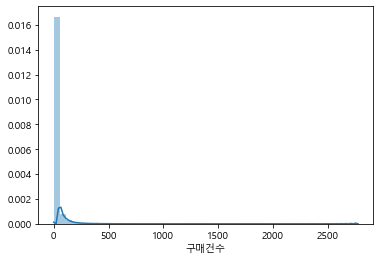

In [27]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.distplot(data3.구매건수)

## 3.2 독립변수 (명목형) 분포

In [28]:
ob_feature = [i for i in data3.columns if data3[i].dtype==object]
ob_feature

['계절', '월', '일', '요일', '평일/주말', '공휴일', '성별', '연령대', '대분류명', '소분류명']

In [29]:
# '일' 변수와 '소분류명' 변수는 값이 많으므로 그래프를 따로 생성하여 확인
ob_feature.remove('일')
ob_feature.remove('소분류명')

In [30]:
ob_feature

['계절', '월', '요일', '평일/주말', '공휴일', '성별', '연령대', '대분류명']

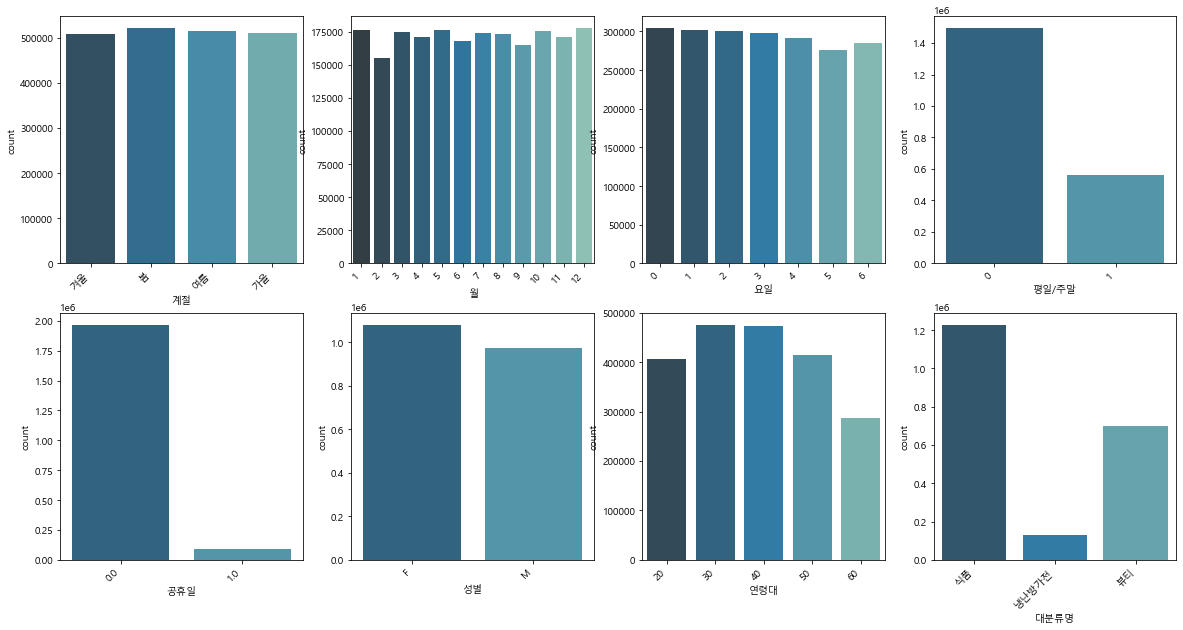

In [31]:
fig, axs = plt.subplots(2,4, figsize=(20,10))
for i, feature in enumerate(ob_feature):
    row = int(i/4)
    col = i%4
    sns.countplot(data3[feature], ax=axs[row, col], palette='YlGnBu_d')
    plt.setp(axs[row, col].get_xticklabels(), rotation=45, ha='right')

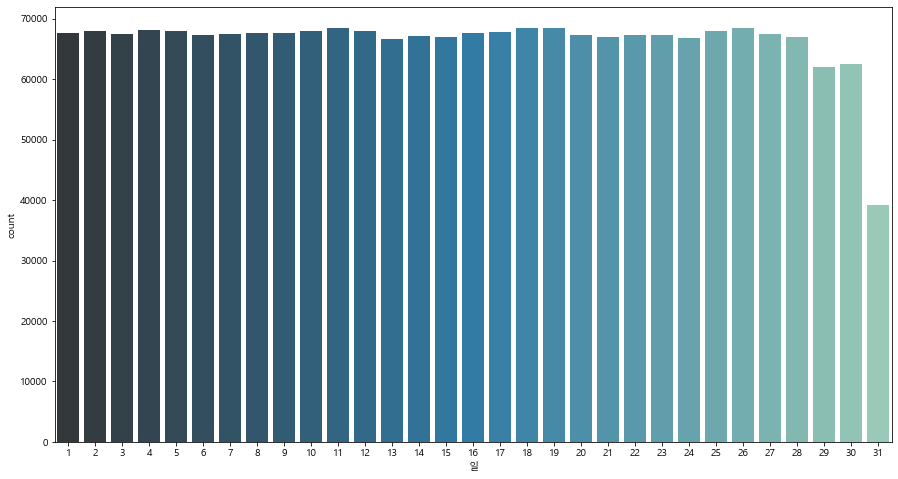

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(data3['일'], palette="YlGnBu_d")

In [28]:
# 상위 30개 소분류명
data3['소분류명'].value_counts(ascending=False)[:30]

두유               7300
인스턴트커피           7300
생수               7300
샴푸               7300
기초 화장용 크림        7300
쌀                7299
한방 분말/환제품        7299
비타민              7299
홍삼액/홍삼정          7298
프로바이오틱스          7298
회                7297
탄산음료             7296
기초 화장용 에센스       7296
헤어스타일링용 염색약      7295
커피음료             7293
흰우유              7292
루테인/눈 영양제        7290
오메가3/스쿠알렌 영양제    7288
원두커피             7286
배추김치             7285
기초 화장용 로션        7285
김치류              7285
다이어트보조식          7281
기초 화장용 스킨        7276
스킨케어 마스크팩        7276
과채 음료/주스         7275
클렌징 폼            7272
화장 비누            7270
복분자/석류/과실즙       7266
닭가슴살             7263
Name: 소분류명, dtype: int64

In [29]:
# 하위 30개 소분류명
data3['소분류명'].value_counts(ascending=True)[:30]

여성향수              11
색조 메이크업 세트        76
남성향수              76
산림욕기             105
중대형 에어컨          119
가스온수기            136
기능성 화이트닝 화장품     167
난방용 열풍기          181
향수세트             252
에어커튼             280
과일채소 분말/분태       304
마/야콘             417
천장형 에어컨          539
영지버섯             768
선파우더             812
헤어무스             995
구이/수육용 돈육       1034
벽걸이형 냉온풍기       1037
신발건조기           1071
상황버섯            1116
돈풍기             1121
혼합곡             1283
기능성 링클케어 화장품    1356
보일러             1555
우엉/연근           1560
커피용 프림          1643
건어물 건새우         1753
태닝용 선크림         1939
풋스프레이           2002
가열식 가습기         2123
Name: 소분류명, dtype: int64

## 3.3 독립변수 (명목형) - 구매건수

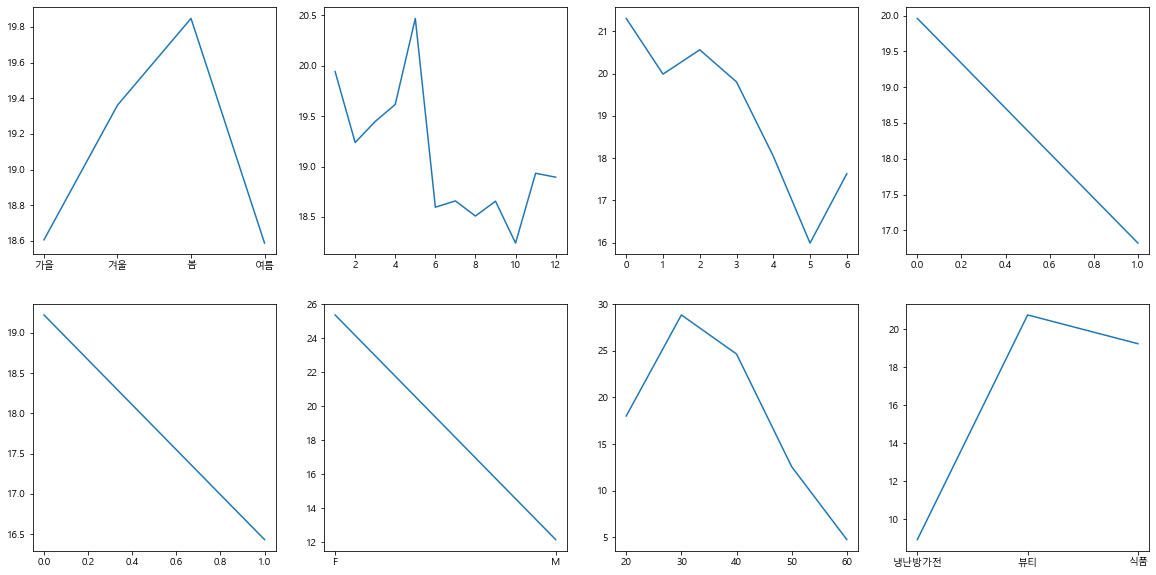

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(241)
plt.plot(data3.groupby('계절')['구매건수'].mean())

plt.subplot(242)
plt.plot(data3.groupby('월')['구매건수'].mean())

plt.subplot(243)
plt.plot(data3.groupby('요일')['구매건수'].mean())

plt.subplot(244)
plt.plot(data3.groupby('평일/주말')['구매건수'].mean())

plt.subplot(245)
plt.plot(data3.groupby('공휴일')['구매건수'].mean())

plt.subplot(246)
plt.plot(data3.groupby('성별')['구매건수'].mean())

plt.subplot(247)
plt.plot(data3.groupby('연령대')['구매건수'].mean())

plt.subplot(248)
plt.plot(data3.groupby('대분류명')['구매건수'].mean())

수치상 큰 차이는 없지만 **봄에 구매건수가 가장 많은 것으로 나타남**

주말과 공휴일의 구매건수가 적은 것처럼 보이나, 데이터 수 자체가 상대적으로 적은 것이기 때문에 큰 의미는 없음 (평일/주말 변수는 제외해도 될듯)

여성 데이터가 더 많은 것을 감안해도 남성보다는 **여성의 구매건수가 많음**

**30대, 40대, 20대의 구매건수가 50대, 60대의 구매건수에 비해 약 2배 이상 많음**

데이터는 식품이 가장 많지만 **구매건수는 뷰티가 가장 많음**

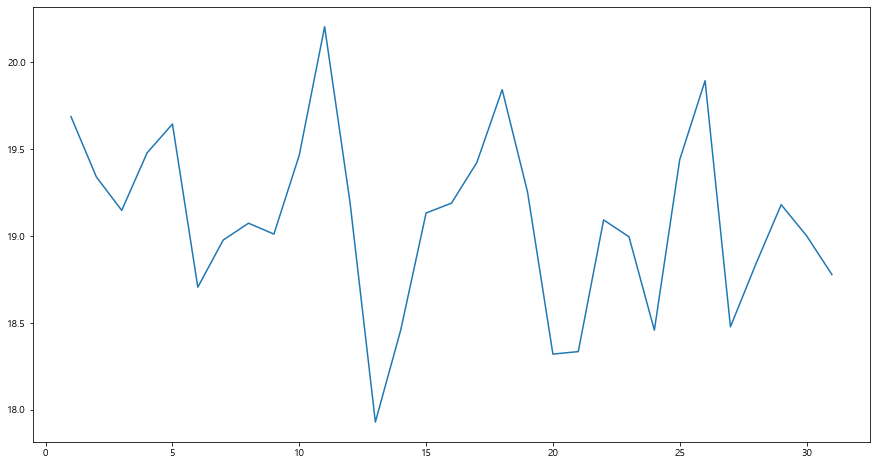

In [32]:
plt.figure(figsize=(15,8))
plt.plot(data3.groupby('일')['구매건수'].mean())

## 3.4 독립변수 (수치형) 분포

In [33]:
nu_feature = list(set(data3.columns) - set(ob_feature))
nu_feature

['일',
 '평균습도(%rh)',
 '평균일강수량(mm)',
 '평균기온(℃)',
 '10만건당 건수',
 '일사합',
 '소분류명',
 '일 미세먼지 농도(㎍/㎥)',
 '일조합',
 '구매건수',
 '평균풍속(km/h)',
 '체감온도(℃)']

In [34]:
nu_feature.remove('구매건수')
nu_feature.remove('소분류명')
nu_feature.remove('일')

In [35]:
nu_feature

['평균습도(%rh)',
 '평균일강수량(mm)',
 '평균기온(℃)',
 '10만건당 건수',
 '일사합',
 '일 미세먼지 농도(㎍/㎥)',
 '일조합',
 '평균풍속(km/h)',
 '체감온도(℃)']

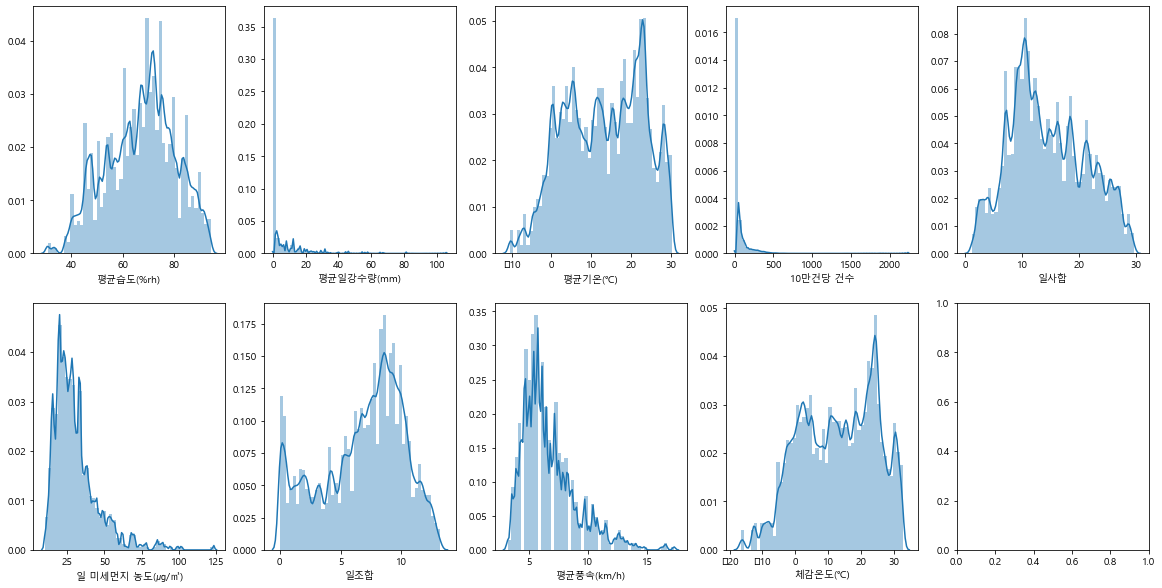

In [36]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
for i, feature in enumerate(nu_feature):
    row = int(i/5)
    col = i%5
    sns.distplot(data[feature], ax=axs[row, col])

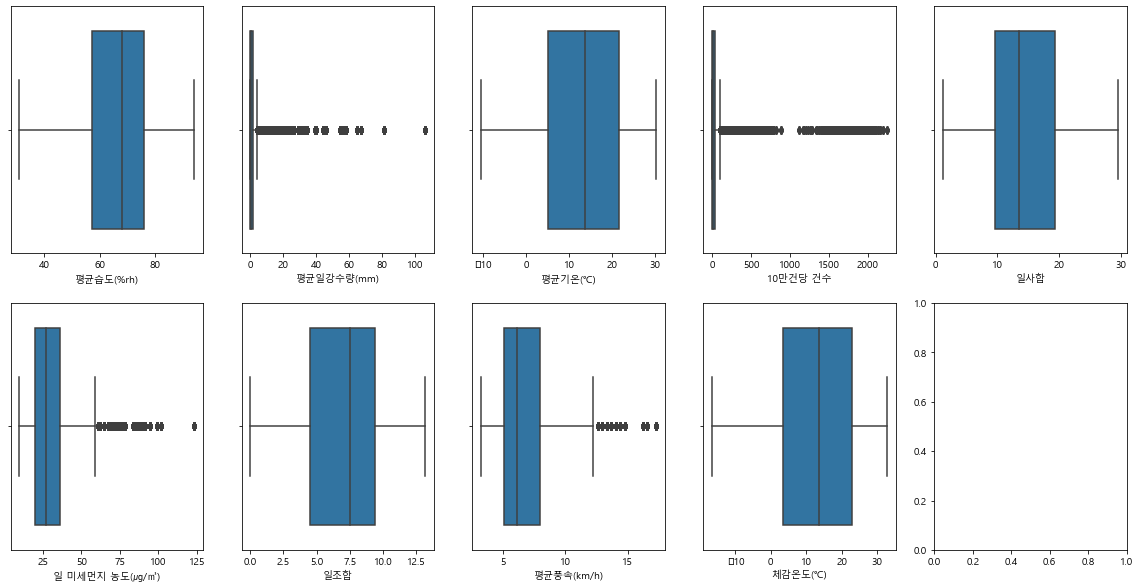

In [37]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
for i, feature in enumerate(nu_feature):
    row = int(i/5)
    col = i%5
    sns.boxplot(data[feature], ax=axs[row, col])

4개 컬럼의 이상치 처리에 대한 논의 필요

## 3.5 독립변수 (수치형) - 구매건수 상관관계

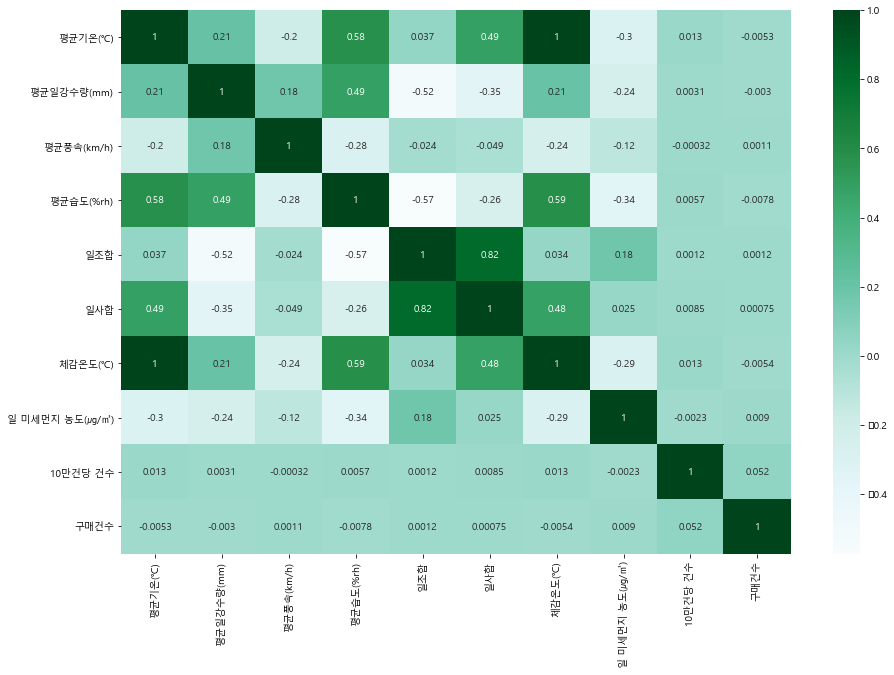

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(data3.corr(), annot=True, cmap='BuGn')

**현재 수치형 독립변수와 구매건수 간의 상관관계가 있다고 보기 어려움**

In [39]:
# 다중공선성 확인 (NaN 값이 있는 미세먼지 변수 제외)
from statsmodels.stats.outliers_influence import variance_inflation_factor

corr_df = data3[['평균습도(%rh)','일사합','체감온도(℃)','평균기온(℃)','10만건당 건수','평균풍속(km/h)',\
                 '평균일강수량(mm)','일조합']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corr_df.values, i) for i in range(corr_df.shape[1])]
vif["features"] = corr_df.columns
vif

,VIF Factor,features
0,18.173298,평균습도(%rh)
1,52.610373,일사합
2,4353.631999,체감온도(℃)
3,5356.718625,평균기온(℃)
4,1.137435,10만건당 건수
5,48.010579,평균풍속(km/h)
6,1.914945,평균일강수량(mm)
7,31.031480,일조합


In [40]:
# VIF 계수 높은 평균기온 변수 제거
corr_df = corr_df.drop(['평균기온(℃)'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corr_df.values, i) for i in range(corr_df.shape[1])]
vif["features"] = corr_df.columns
vif

,VIF Factor,features
0,12.283469,평균습도(%rh)
1,51.166780,일사합
2,9.596421,체감온도(℃)
3,1.137390,10만건당 건수
4,9.845120,평균풍속(km/h)
5,1.893143,평균일강수량(mm)
6,31.031411,일조합


In [41]:
# VIF 계수 높은 일사합 변수 제거
corr_df = corr_df.drop(['일사합'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corr_df.values, i) for i in range(corr_df.shape[1])]
vif["features"] = corr_df.columns
vif

,VIF Factor,features
0,11.621080,평균습도(%rh)
1,3.631355,체감온도(℃)
2,1.137249,10만건당 건수
3,8.686661,평균풍속(km/h)
4,1.837237,평균일강수량(mm)
5,5.885389,일조합


평균습도 변수도 VIF(분산팽창요인)가 10 이상으로 높은 편이지만, 일단은 보류

다중공선성에 걸리는 독립 변수들을 **대체할 변수를 찾거나, 좀 더 새로운 변수를 탐색**해야 함

In [43]:
data4 = data3[['계절','월','일','요일','공휴일','성별','연령대','대분류명','소분류명',\
               '평균일강수량(mm)','평균풍속(km/h)','평균습도(%rh)','일조합',\
               '체감온도(℃)','일 미세먼지 농도(㎍/㎥)','10만건당 건수','구매건수']]
print(data4.shape)
data4.head(3)

(2056899, 17)


,계절,월,일,요일,공휴일,성별,연령대,대분류명,소분류명,평균일강수량(mm),평균풍속(km/h),평균습도(%rh),일조합,체감온도(℃),일 미세먼지 농도(㎍/㎥),10만건당 건수,구매건수
0,겨울,1,1,0,1,F,20,식품,가공란,0.0,6.84,51.0,8.7,-2.810026,32.962963,0.480964,37
1,겨울,1,1,0,1,F,30,식품,가공란,0.0,6.84,51.0,8.7,-2.810026,32.962963,0.480964,16
2,겨울,1,1,0,1,F,40,식품,가공란,0.0,6.84,51.0,8.7,-2.810026,32.962963,0.480964,9


In [45]:
# data4.to_csv('./data/total_data.csv', index=False)